## What will we learn? 

* What is Gradients?
* Image Gradients and effect of Noise
* Sobel kernel

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

** Gradients **

An increase or decrease in the magnitude of a property (e.g. temperature, pressure, or concentration) observed in passing from one point or moment to another.

** Image Gradients **

Derivatives of a digital function are defined in terms of differences. There are various ways to define these differences. However, we require that any definition we use for a first derivative:

- Must be zero in areas of constant intensity.
- Must be nonzero at the onset of an intensity step or ramp.
- Must be nonzero along with intensity ramps.

A basic definition of the first-order derivative of an one-dimensional function f(x) is the difference:
                                                   
                                                    df/dx = f(x+1) - f(x)

In [6]:
def correlation(f, kernel):

    c = np.zeros_like(f)
    for i in range(c.shape[0]):

        a = -kernel.shape[0]//2
        gx = 0
        for j in range(kernel.shape[0]):
            if i+a < 0 or i+a >= f.shape[0]:
                fs = 0
            else:
                fs = f[i+a]
            ws = kernel[j]
            gx += (fs*ws)
            a+=1
        c[i] = gx
    return c

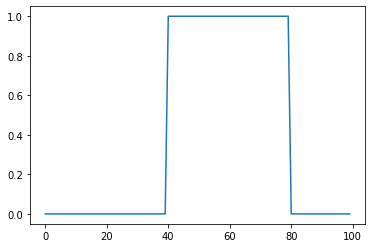

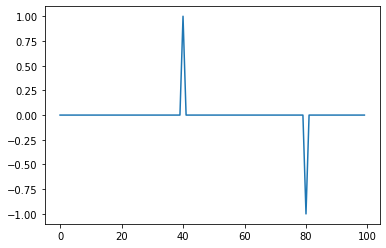

In [16]:
f = np.zeros((100, 1), dtype="int")
f[40: 80] = 1
kernel = np.array([-1,1], dtype="int").reshape(-1,1)
plt.plot(f)
# plt.axis("off")
plt.show()

plt.plot(correlation(f, kernel))
# plt.axis("off")
plt.show()

** Horizontal scan line of a 2D image **

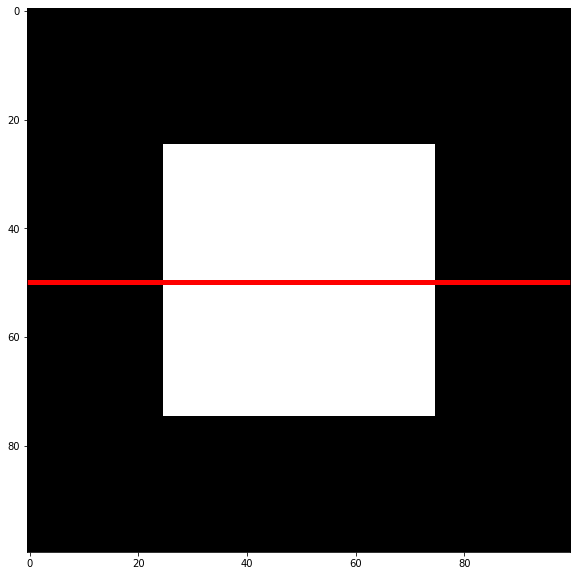

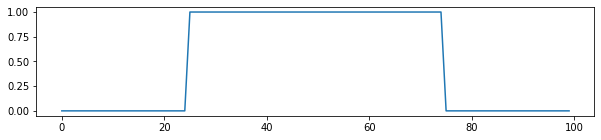

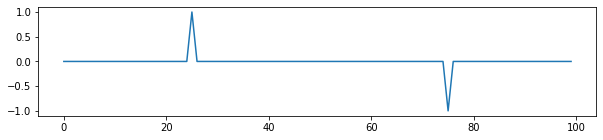

In [26]:
img = np.zeros((100, 100, 3), dtype="uint8")
img[25:75, 25:75] = (255,255,255)

img[50, 0:100] = (255, 0, 0)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


f = np.zeros((100, 1), dtype="int")
f[25:75] = 1

kernel = np.array([-1,1], dtype="int").reshape(-1,1)
plt.figure(figsize=(10,2))
plt.plot(f)
# plt.axis("off")
plt.show()

plt.figure(figsize=(10,2))
plt.plot(correlation(f, kernel))
# plt.axis("off")
plt.show()

** In presence of noise **

In [64]:
from scipy.ndimage.filters import gaussian_filter

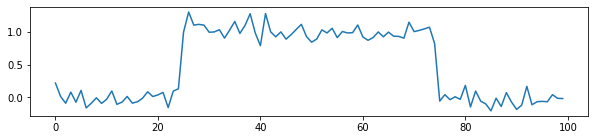

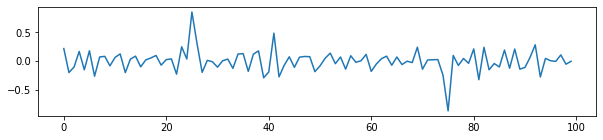

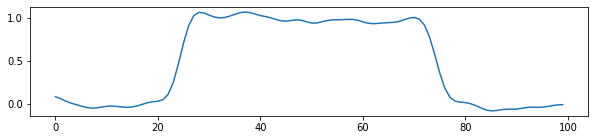

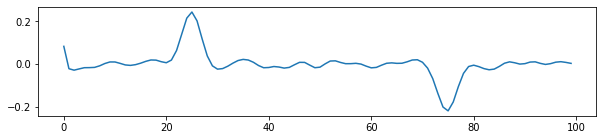

In [72]:
noise = np.random.randn(100,1) ## Additive noise

f = np.zeros((100, 1), dtype="float")
f[25:75] = 1
f = f + 0.1*noise


kernel = np.array([-1,1], dtype="float").reshape(-1,1)
plt.figure(figsize=(10,2))
plt.plot(f)
# plt.axis("off")
plt.show()

plt.figure(figsize=(10,2))
plt.plot(correlation(f, kernel))
# plt.axis("off")
plt.show()

plt.figure(figsize=(10,2))
plt.plot(gaussian_filter(f, sigma=11/6))
plt.show()

plt.figure(figsize=(10,2))
plt.plot(correlation(gaussian_filter(f, sigma=11/6), kernel))
plt.show()

** 2D image gradients **

In x direction:
                                                   
                                                    gx = df(x,y)/dx = f(x+1,y) - f(x,y)
In y direction:
                                                   
                                                    gy = df(x,y)/dx = f(x,y+1) - f(x,y)

Magnitude:

                                                    M(x,y) = ||(gx, gy)|| <- l2-norm

Direction:

                                                    a(x, y) = tan-1(gx/gy)

Note: df/dx is partial derivative

A better kernel for 2D gradients:

                                                        [[z1, z2, z3],
                                                        [z4, z5, z6],
                                                        [z7, z8, z9]]

                                    gx = df(x,y)/dx = (z7 + z8 + z9) - (z1 + z2 + z3)
                                    gy = df(x,y)/dy = (z3 + z6 + z9) - (z1 + z4 + z7)

A even better kernel (with smoothing) for 2D gradients: **The Sobel kernel**

                                                        [[z1, z2, z3],
                                                        [z4, z5, z6],
                                                        [z7, z8, z9]]

                                    gx = df(x,y)/dx = (z3 + 2*z6 + z9) - (z1 + 2*z4 + z7)
                                    gy = df(x,y)/dy = (z7 + 2*z8 + z9) - (z1 + 2*z2 + z3)

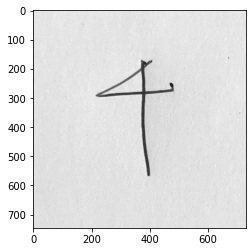

In [75]:
digit = cv2.imread("./digit.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(digit, cmap="gray")
plt.show()

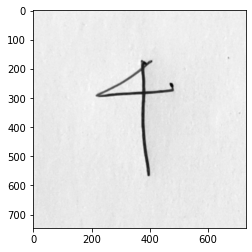

In [79]:
blur = cv2.GaussianBlur(digit,(7,7),7/6)
plt.imshow(blur, cmap="gray")
plt.show()

In [ ]:
cv2.

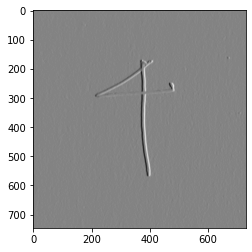

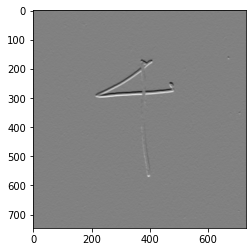

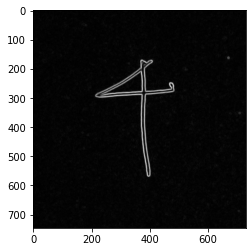

In [84]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)

plt.imshow(sobelx, cmap="gray")
plt.show()

plt.imshow(sobely, cmap="gray")
plt.show()


plt.imshow((sobelx**2 + sobely**2)**0.5, cmap="gray")
plt.show()

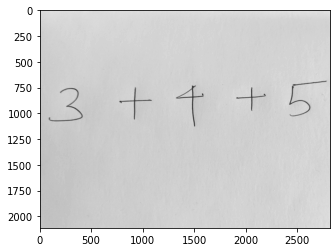

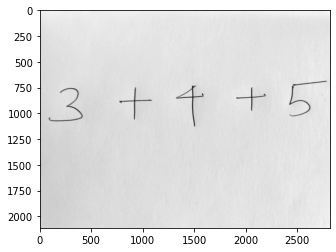

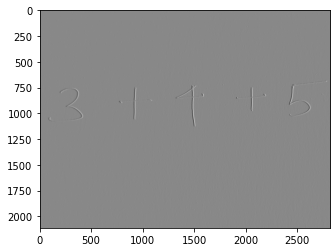

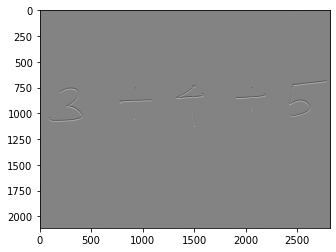

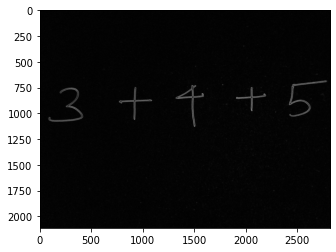

In [92]:
digit = cv2.imread("./digits.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(digit, cmap="gray")
plt.show()

blur = cv2.GaussianBlur(digit,(7,7),7/6)
plt.imshow(blur, cmap="gray")
plt.show()

sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)

plt.imshow(sobelx, cmap="gray")
plt.show()

plt.imshow(sobely, cmap="gray")
plt.show()


plt.imshow((sobelx**2 + sobely**2)**0.5, cmap="gray")
plt.show()

Next Session?

We learn about Gradient directions, Edges and the Canny Edge Detector.